In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sympy import *
from matplotlib import cm
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_boston
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale
from scipy import stats
%matplotlib inline

In [2]:
def scan1(name):
    times = []
    cnt = 0
    with open(name) as file_in:
        c = 0
        for line in file_in:
            print(line)
            if cnt % 6 in [1,2,3]:
                times.append(int(line.split(' ')[2]))
#                 print(int(line.split(' ')[2]))
            cnt += 1
    return times

In [3]:
data = scan1('res1.txt')

n = 500 ,m = 500 ,time = 1000 ,threads = 1 , cycle= 10

serial simple: 109 s

parallel simple: 113 s

parallel fine: 108 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 2 , cycle= 10

serial simple: 109 s

parallel simple: 58 s

parallel fine: 56 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 3 , cycle= 10

serial simple: 105 s

parallel simple: 38 s

parallel fine: 39 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 4 , cycle= 10

serial simple: 111 s

parallel simple: 35 s

parallel fine: 34 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 5 , cycle= 10

serial simple: 109 s

parallel simple: 25 s

parallel fine: 26 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 6 , cycle= 10

serial simple: 108 s

parallel simple: 23 s

parallel fine: 21 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 7 , cycle= 10

serial simple: 113 s

parallel simple: 29 s

parallel fine: 20 s

OK

OK

n = 500 ,m = 500 ,time = 1000 ,threads = 8 , cycle= 10

serial simple: 113 s

parallel s

In [4]:
ser = np.array([data[3*i] for i in range(len(data)//3)])
sim = np.array([data[3*i+1] for i in range(len(data)//3)])
fin = np.array([data[3*i+2] for i in range(len(data)//3)])

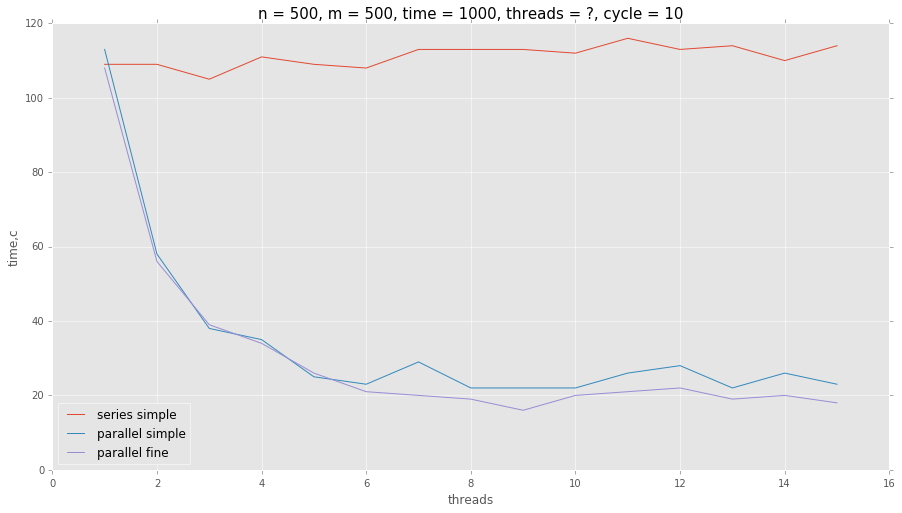

average advantage:  24.0 %


In [5]:
ox  = np.arange(1,16)
plt.figure(figsize=(15,8))
plt.plot(ox,ser,label='series simple')
plt.plot(ox,sim,label='parallel simple')
plt.plot(ox,fin,label='parallel fine')
plt.title('n = 500, m = 500, time = 1000, threads = ?, cycle = 10', fontsize = 15)
plt.xlabel('threads')
plt.ylabel('time,c')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print('average advantage: ', round(100 * np.mean([abs(sim[i] - fin[i])/min(sim[i],fin[i]) for i in range(5,15)]),0), '%')

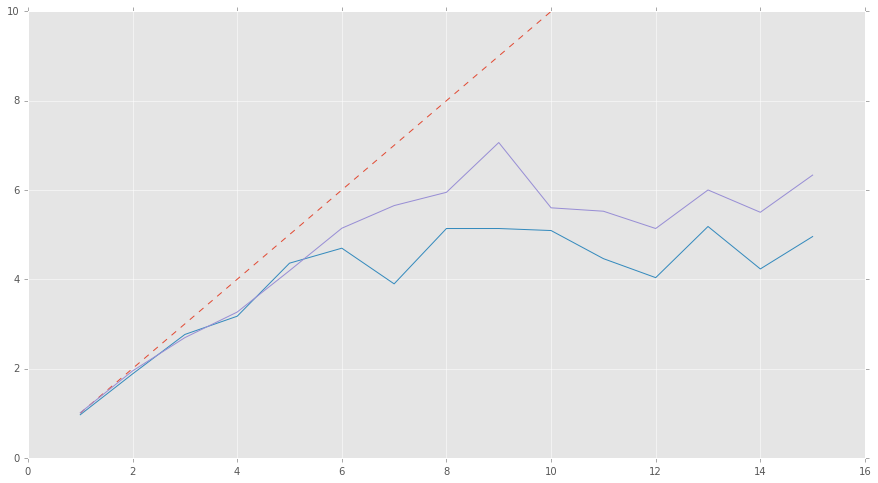

In [9]:
ox  = np.arange(1,16)
plt.figure(figsize=(15,8))
# plt.plot(ox,ser,label='series simple')
plt.plot(ox[:10], ox[:10], '--')
plt.plot(ox,ser/sim,label='parallel simple')
plt.plot(ox,ser/fin,label='parallel fine')
# plt.title('n = 500, m = 500, time = 1000, threads = ?, cycle = 10', fontsize = 15)
# plt.xlabel('threads')
# plt.ylabel('time,c')
# plt.legend(loc='best')
plt.grid(True)
plt.show()
# print('average advantage: ', round(100 * np.mean([abs(sim[i] - fin[i])/min(sim[i],fin[i]) for i in range(5,15)]),0), '%')

In [32]:
def scan2(name):
    times = []
    cnt = 0
    with open(name) as file_in:
        c = 0
        for line in file_in:
#             print(line)
            if cnt % 6 in [1,2,3]:
                times.append(int(line.split(' ')[2]))
#                 print(int(line.split(' ')[2]))
            cnt += 1
    return times

In [33]:
data2 = scan2('res2.txt')
print(data)

[109, 113, 108, 109, 58, 56, 105, 38, 39, 111, 35, 34, 109, 25, 26, 108, 23, 21, 113, 29, 20, 113, 22, 19, 113, 22, 16, 112, 22, 20, 116, 26, 21, 113, 28, 22, 114, 22, 19, 110, 26, 20, 114, 23, 18]


In [35]:
data21 = data2[:30]
data22 = data2[30:]

def getd(data):
    ser = np.array([data[3*i] for i in range(len(data)//3)])
    sim = np.array([data[3*i+1] for i in range(len(data)//3)])
    fin = np.array([data[3*i+2] for i in range(len(data)//3)])
    return ser,sim,fin

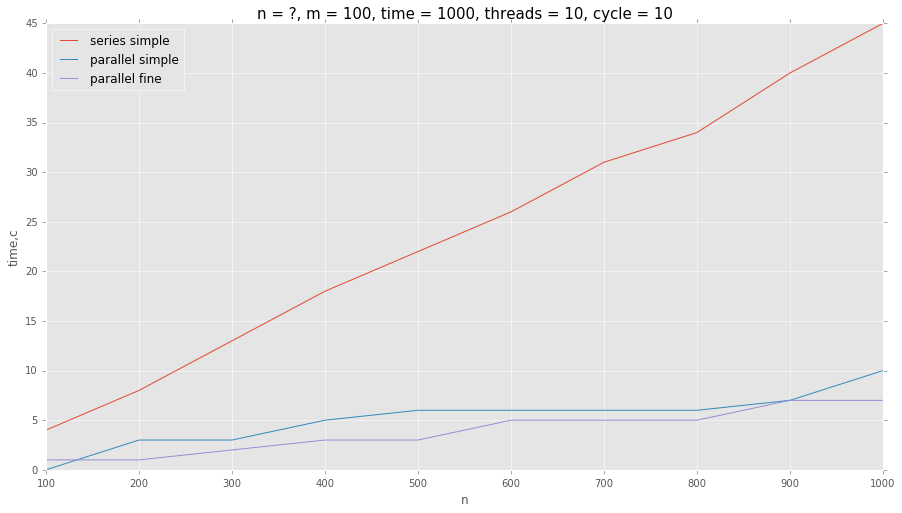

average advantage:  21.0 %


In [54]:
ox = np.arange(100,1100,100)
s1,s2,s3 = getd(data21)
plt.figure(figsize=(15,8))
plt.plot(ox,s1,label='series simple')
plt.plot(ox,s2,label='parallel simple')
plt.plot(ox,s3,label='parallel fine')
plt.title('n = ?, m = 100, time = 1000, threads = 10, cycle = 10', fontsize = 15)
plt.xlabel('n')
plt.ylabel('time,c')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# print([abs(s2[i] - s3[i])/max(1,min(s2[i],s3[i])) for i in range(0,10)])
print('average advantage: ', round(100 * np.mean([abs(s2[i] - s3[i])/max(1,min(s2[i],s3[i])) for i in range(5,10)]),0), '%')

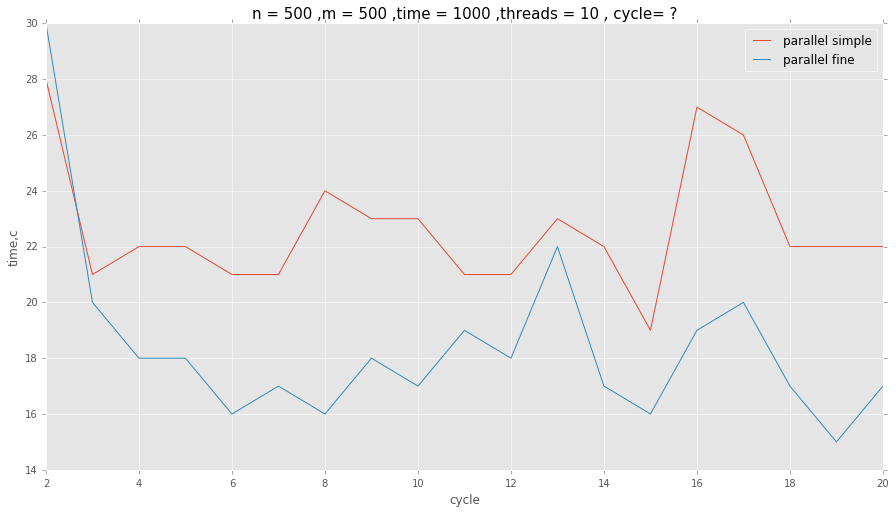

average advantage:  25.0 %


In [73]:
ox = np.arange(2,21)
s1,s2,s3 = getd(data22)
plt.figure(figsize=(15,8))
# plt.plot(ox,s1,label='series simple')
plt.plot(ox,s2,label='parallel simple')
plt.plot(ox,s3,label='parallel fine')
plt.title('n = 500 ,m = 500 ,time = 1000 ,threads = 10 , cycle= ?', fontsize = 15)
plt.xlabel('cycle')
plt.ylabel('time,c')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print('average advantage: ', round(100 * np.mean([abs(s2[i] - s3[i])/min(s2[i],s3[i]) for i in range(18)]),0), '%')
# plt.plot(ox,s2,label='parallel simple')
# plt.plot(ox,s3,label='parallel fine')
# plt.show()

In [61]:
def scan3(name):
    times = []
    cnt = 0
    with open(name) as file_in:
        c = 0
        for line in file_in:
#             print(line)
            if cnt % 3 in [1,2]:
                times.append(int(line.split(' ')[2]))
#                 print(int(line.split(' ')[2]))
            cnt += 1
    return times

In [62]:
data3 = scan3('res3.txt')

In [63]:
print(data3)

[40, 38, 42, 33, 46, 36, 45, 35, 41, 33, 53, 36, 46, 37, 49, 34, 44, 36, 46, 36, 45, 31, 45, 32, 45, 33, 55, 39, 45, 38, 49, 39, 49, 34, 49, 39, 42, 34, 47, 37, 55, 38, 46, 32, 47, 30, 42, 33, 45, 32, 47, 31, 46, 32, 48, 40, 48, 30, 46, 33, 46, 31, 43, 32, 46, 33, 45, 37, 52, 41, 45, 29, 44, 30, 44, 30]


In [64]:
def get2(data):
    sim = np.array([data[2*i] for i in range(len(data)//2)])
    fin = np.array([data[2*i+1] for i in range(len(data)//2)])
    return sim,fin

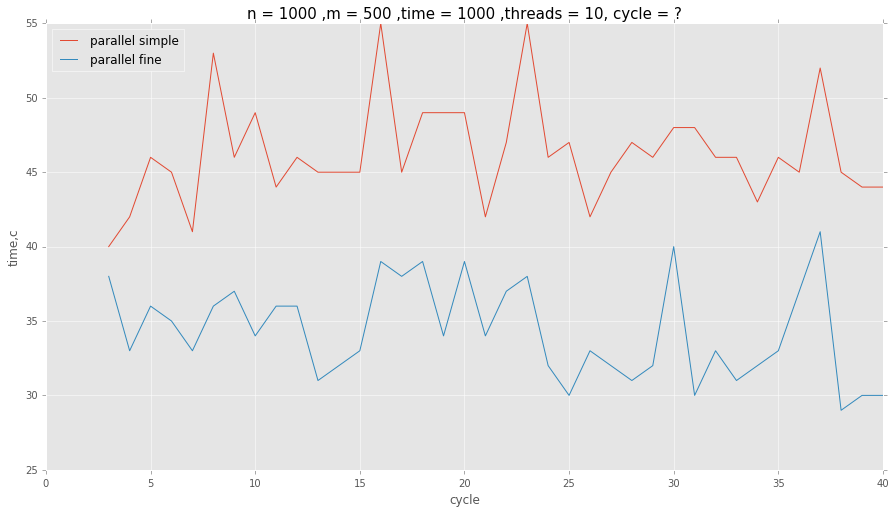

average advantage:  33.0 %


In [71]:
ox = np.arange(3,41)
s2,s3 = get2(data3)
plt.figure(figsize=(15,8))
# plt.plot(ox,s1,label='series simple')
plt.plot(ox,s2,label='parallel simple')
plt.plot(ox,s3,label='parallel fine')
plt.title('n = 1000 ,m = 500 ,time = 1000 ,threads = 10, cycle = ?', fontsize = 15)
plt.xlabel('cycle')
plt.ylabel('time,c')
plt.legend(loc='best')
plt.grid(True)
plt.show()
# print([abs(s2[i] - s3[i])/max(1,min(s2[i],s3[i])) for i in range(0,10)])
print('average advantage: ', round(100 * np.mean([abs(s2[i] - s3[i])/max(1,min(s2[i],s3[i])) for i in range(5,10)]),0), '%')